# Proyecto 2

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

In [6]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import matplotlib.dates as mdates
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


In [7]:
# Carga de dataset
data = pd.read_csv('logs_exp_us.csv', sep= '\t')

# Diagnostico incial de los datos

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [9]:
data.sample(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
190021,MainScreenAppear,7316683411435209477,1565087959,248
218623,PaymentScreenSuccessful,1406753793485315697,1565162785,246
98577,MainScreenAppear,8151171791094472646,1564847363,247
49281,Tutorial,6332565246182501322,1564737031,248
216805,MainScreenAppear,3695682546619974353,1565158147,248
15215,MainScreenAppear,3690159454468088620,1564657115,246
112831,OffersScreenAppear,6614985746798545862,1564903628,246
35307,OffersScreenAppear,6707886513123955772,1564686550,246
87442,PaymentScreenSuccessful,8173190940950873857,1564830729,246
132627,OffersScreenAppear,6394616444764198947,1564936209,246


In [10]:
#Contamos los casos de cada experimento para ver si hay desequilibrio
data['ExpId'].value_counts()

ExpId
248    85747
246    80304
247    78075
Name: count, dtype: int64

In [11]:
#Contamos los nombres de los eventos
data['EventName'].value_counts()

EventName
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

In [12]:
#Revisamos el total de usuarios
data['DeviceIDHash'].nunique()

7551

# Plan de trabajo

- Cambiamos el nombre de las columnas a un tipo snakecase
- Cambiamos el tipo de columna de EventTimestamp a tipo datetime
- Hacemos mas semantico los grupos de experimento
- Agregamos la columnas de fecha y hora
- Eliminamos los registros de Tutorial

# Procesamiento de datos

In [13]:
#Cambiamos el nombre de las columna a snakecase
data = data.rename(columns={'EventName': 'event', 'DeviceIDHash': 'user', 'EventTimestamp':'timestamp', 'ExpId': 'exp_id'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   event      244126 non-null  object
 1   user       244126 non-null  int64 
 2   timestamp  244126 non-null  int64 
 3   exp_id     244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [14]:
# Cambiamos el tipo de datos de la columna EventTimestamp
data['timestamp'] = pd.to_datetime(data['timestamp'],unit='s')
data

,event,user,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [15]:
#Agregamos la columna de dia
data['date'] = data['timestamp'].dt.floor('d')
data

,event,user,timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [16]:
#Agregamos la columna de Hora
data['hour'] = data['timestamp'].dt.hour
data

,event,user,timestamp,exp_id,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,4
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21


In [17]:
#Hacemos mas semantica la columna ExpId
def exp_sem(x):
    if x == 246:
        return 'A1'
    elif x == 247:
        return 'A2'
    else:
        return 'B'
data['group'] = data['exp_id'].apply(exp_sem)
data.sample(10)

,event,user,timestamp,exp_id,date,hour,group
155673,OffersScreenAppear,2121174247160023476,2019-08-05 11:54:44,248,2019-08-05,11,B
134259,PaymentScreenSuccessful,6847206579854335590,2019-08-04 17:16:21,246,2019-08-04,17,A1
176291,MainScreenAppear,8420911729771828510,2019-08-05 21:22:47,247,2019-08-05,21,A2
214665,CartScreenAppear,1754140665440434215,2019-08-07 04:15:21,247,2019-08-07,4,A2
222165,MainScreenAppear,4558270579483616930,2019-08-07 09:39:57,248,2019-08-07,9,B
118826,MainScreenAppear,9097925422443755756,2019-08-04 10:30:53,248,2019-08-04,10,B
153774,MainScreenAppear,6888229484609913653,2019-08-05 11:00:09,247,2019-08-05,11,A2
211897,MainScreenAppear,424826562612017366,2019-08-06 20:40:07,247,2019-08-06,20,A2
172909,OffersScreenAppear,4891111378981166101,2019-08-05 18:44:42,248,2019-08-05,18,B
102732,OffersScreenAppear,2910761286178294850,2019-08-03 17:45:39,248,2019-08-03,17,B


In [18]:
#Eliminar los registros del tutorial
data = data.query('event != "Tutorial"')
data.shape

(243074, 7)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243074 entries, 0 to 244125
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      243074 non-null  object        
 1   user       243074 non-null  int64         
 2   timestamp  243074 non-null  datetime64[ns]
 3   exp_id     243074 non-null  int64         
 4   date       243074 non-null  datetime64[ns]
 5   hour       243074 non-null  int32         
 6   group      243074 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(2)
memory usage: 13.9+ MB


# Analisis exploratorio de datos

¿Cuántos eventos hay en los registros?

In [20]:
events = len(data)
print(f'Número de eventos: {events}')

Número de eventos: 243074


¿Cuántos usuarios hay en los registros?

In [21]:
users = data['user'].nunique()
print(f'Número de usuarios: {users}')

Número de usuarios: 7547


¿Cuál es el promedio de eventos por usuario?

In [22]:
event_per_user = events / users
print(f'Número de eventos por usuario: {event_per_user:.2f}')

Número de eventos por usuario: 32.21


¿Qué periodo de tiempo cubren los datos?

In [23]:
days = data['date'].nunique()   
print(f'Número de días: {days}')

Número de días: 14


In [24]:
events_per_day = events / days  
print(f'Número de eventos por día: {events_per_day:.2f}')

Número de eventos por día: 17362.43


In [25]:
print(f'Número de eventos: {events}')
print(f'Usuarios: {users}')
print(f'Días: {days}')
print(f'Eventos por día: {events_per_day:.2f}')
print(f'Eventos por usuario: {event_per_user:.2f}')



Número de eventos: 243074
Usuarios: 7547
Días: 14
Eventos por día: 17362.43
Eventos por usuario: 32.21


### Eventos por día


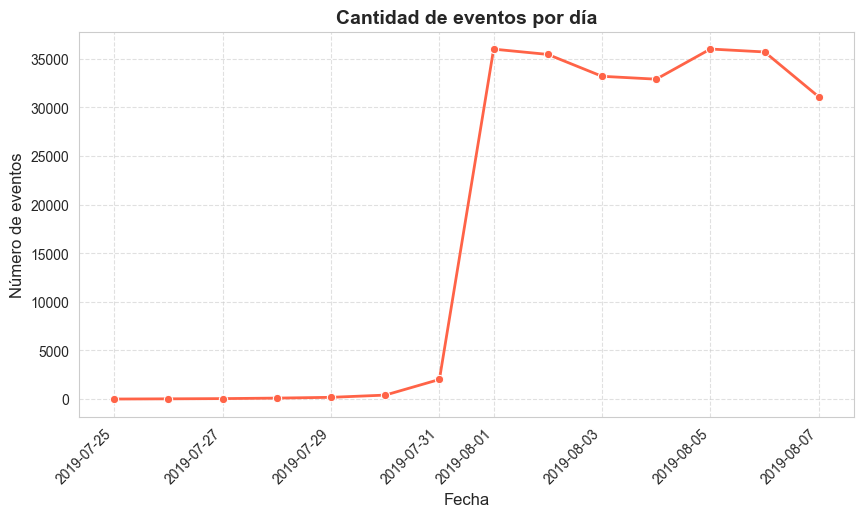

In [26]:
events_by_date = data.groupby('date').agg(events = ('event','count')).reset_index ()

# Estilo
sns.set_style('whitegrid')

# Crear la figura y ajustar tamaño
plt.figure(figsize=(10,5))

# Graficar 
sns.lineplot(
    data=events_by_date,
    x='date',
    y='events',
    marker='o',
    linewidth=2,
    color='tomato'
)

# Mejorar formato de fechas en eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# Títulos y etiquetas
plt.title('Cantidad de eventos por día', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)

# Ajustar cuadrícula
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()

No se tienen los suficientes datos en las primeras fechas, por lo que no nos sirven de nada y los tendriamos que eliminar para que no nos perjudique en nuestra prueba, el periodo representativo real seria apartir del dia 01-08-2019

In [27]:
#Eliminar fechas con poca informacion
data = data.query('date >= "2019-08-01"')


### Eventos por hora

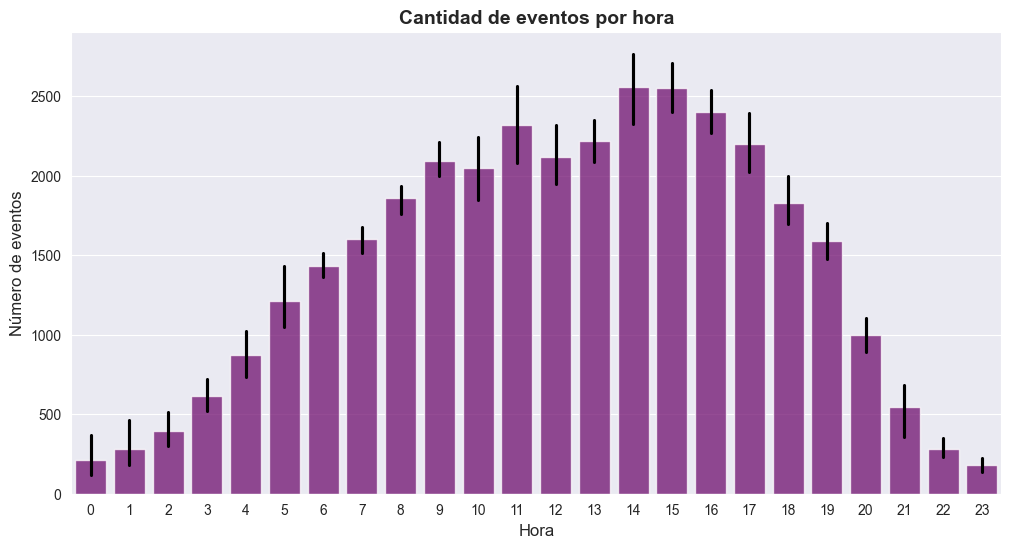

In [28]:
events_by_hour = data.groupby(['date', 'hour']).agg(events=('event', 'count')).reset_index()

#Estilo
sns.set_style('darkgrid')

# Crear la figura y ajustar tamaño
plt.figure(figsize=(12,6))

# Graficar
sns.barplot(
    data=events_by_hour,
    x='hour',
    y='events',
    color='purple',
    alpha=0.75,
    err_kws={'color': 'black'}
)

plt.title('Cantidad de eventos por hora', fontsize=14, fontweight='bold')
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)

plt.show()

¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [29]:
events_2 = len(data)    
total_events_perd = events - events_2
print(f'Numero de eventos perdidos {total_events_perd}')

users_2 = data['user'].nunique()
total_users_perd = users - users_2
print(f'Numero de usuarios perdidos {total_users_perd}')

Numero de eventos perdidos 2815
Numero de usuarios perdidos 17


### Lo cual no represtan un impacto, debido a la cantidad de eventos que se tienen, es minima la perdida

## Balace de grupos experimentales

In [30]:
events_by_exp = data.groupby('group').agg(events=('event', 'count'))
events_by_exp['share'] = (100 * events_by_exp['events'] / events_by_exp['events'].sum()).round(2)
events_by_exp

,events,share
group,,
A1,79102,32.92
A2,76804,31.97
B,84353,35.11


Asegúrate de tener usuarios de los tres grupos experimentales.

In [31]:
users_by_exp = data.groupby('group').agg(users=('user', 'nunique'))
users_by_exp['share'] = (100 * users_by_exp['users'] / users_by_exp['users'].sum()).round(2)
users_by_exp

,users,share
group,,
A1,2483,32.97
A2,2512,33.36
B,2535,33.67


## Eventos y frecuencia de suceso

In [32]:
# Frecuencia de eventos
funnel =(
    data.pivot_table(index= 'event', values='user', aggfunc='nunique').sort_values('user', ascending=False)
)

funnel


,user
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539


In [33]:
# Cantidad de usuarios por evento y procentajes
funnel['conv'] = (100*funnel['user'] / funnel['user'].max()).round(2)
print(funnel)

                         user    conv
event                                
MainScreenAppear         7419  100.00
OffersScreenAppear       4593   61.91
CartScreenAppear         3734   50.33
PaymentScreenSuccessful  3539   47.70


In [34]:
# Definir el orden del embudo
funnel_steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Contar usuarios únicos en cada evento
users_per_step = data.groupby('event')['user'].nunique().reindex(funnel_steps, fill_value=0)

# Calcular proporciones de conversión
conversion_rates = users_per_step.shift(-1) / users_per_step *100

# Combinar resultados en un DataFrame
funnel_df = pd.DataFrame({
    'Usuarios únicos': users_per_step,
    'Proporción de conversión': conversion_rates
}).fillna(0)  


print(funnel_df)

# Calcular proporciones de conversión
conversion_B_A = users_per_step['OffersScreenAppear'] / users_per_step['MainScreenAppear']  # Proporción B respecto a A
conversion_C_B = users_per_step['CartScreenAppear'] / users_per_step['OffersScreenAppear']  # Proporción C respecto a B


print(f"Proporción de usuarios que pasan de A → B: {conversion_B_A:.2%}")
print(f"Proporción de usuarios que pasan de B → C: {conversion_C_B:.2%}")

                         Usuarios únicos  Proporción de conversión
event                                                             
MainScreenAppear                    7419                 61.908613
OffersScreenAppear                  4593                 81.297627
CartScreenAppear                    3734                 94.777718
PaymentScreenSuccessful             3539                  0.000000
Proporción de usuarios que pasan de A → B: 61.91%
Proporción de usuarios que pasan de B → C: 81.30%


Se pierden mas usuarios cuando pasan a la pantlla de ofertas y de todos los usuarios el 47 % hacen todo el viaje desde su primer evento hasta el pago

# Tasas de conversion por grupo 

In [35]:
# Tasa de conversion grupo A1
funnel_A1 = (
    data.query('group == "A1"')
    .pivot_table(index= 'event', values='user', aggfunc='nunique')
    .sort_values('user', ascending=False)
)

n_A1 = funnel_A1['user'].max()
funnel_A1['convA1'] = (100*funnel_A1['user'] / n_A1).round(2)
funnel_A1.drop(columns='user', inplace=True)

print(funnel_A1)

                         convA1
event                          
MainScreenAppear         100.00
OffersScreenAppear        62.94
CartScreenAppear          51.67
PaymentScreenSuccessful   48.98


In [36]:
funnel_A2 = (
    data.query('group == "A2"')
    .pivot_table(index='event', values='user', aggfunc='nunique')
    .sort_values('user', ascending=False)
)

n_A2 = funnel_A2['user'].max()
funnel_A2['convA2'] = 100*funnel_A2['user'] / n_A2
funnel_A2.drop(columns='user', inplace=True)

print(funnel_A2) 

                             convA2
event                              
MainScreenAppear         100.000000
OffersScreenAppear        61.389338
CartScreenAppear          50.000000
PaymentScreenSuccessful   46.768982


In [37]:
# Tasa de conversion grupo B

funnel_B = (
    data.query('group == "B"')
    .pivot_table(index='event', values='user', aggfunc='nunique')
    .sort_values('user', ascending=False)
)

n_B = funnel_B['user'].max()
funnel_B['convB'] = 100*funnel_B['user'] / n_B
funnel_B.drop(columns='user', inplace=True)

print(funnel_B) 



                              convB
event                              
MainScreenAppear         100.000000
OffersScreenAppear        61.411953
CartScreenAppear          49.338147
PaymentScreenSuccessful   47.372643


In [38]:
#funnel agregado

funnel = (
    funnel_A1
    .merge(funnel_A2, on= 'event')
    .merge(funnel_B, on='event')
)

funnel.columns = ['A1', 'A2', 'B']  

print(funnel)

                             A1          A2           B
event                                                  
MainScreenAppear         100.00  100.000000  100.000000
OffersScreenAppear        62.94   61.389338   61.411953
CartScreenAppear          51.67   50.000000   49.338147
PaymentScreenSuccessful   48.98   46.768982   47.372643


**Pruebas de hipotesis**

- Hipotesis nula: No hay diferencias significativas entre los grupos experimentales
- hipotesis alternativa: Existen diferencias significativas entre los grupos experimentales

In [39]:
# Usuarios en cada grupo
n = pd.Series([n_A1, n_A2, n_B], index=['A1', 'A2', 'B'])
n

A1    2450
A2    2476
B     2493
dtype: int64

Diferencia estadistica entre las muestras A1 y A2

In [40]:
alpha = 0.05

# Prueba de hipotesis en el evento offerscreenappear antre A1 y A2 
p_1 = funnel.loc['OffersScreenAppear', 'A1'] /100
suc_1 = int(p_1*n['A1'])

p_2 = funnel.loc['OffersScreenAppear', 'A2'] /100
suc_2 = int(p_2*n['A2'])

suc = [suc_1, suc_2]
obs = [n['A1'], n['A2']]

z_stat, p_value = proportions_ztest(
    count=suc,
    nobs=obs,
    alternative='two-sided'
)

print (f'Valor p: {p_value:.1%}')
(inf_1, inf_2), (sup_1, sup_2) = proportion_confint(
    count=suc,
    nobs=obs,
    alpha=alpha
)

print (f'Intervalo de confianza: [{inf_1:.1%}, {sup_1:.1%}]')   
print (f'Intervalo de confianza: [{inf_2:.1%}, {sup_2:.1%}]')

#desicion

if p_value > alpha:
    print('No se rechaza la hipotesis nula: Las tasas de conversion son iguales')
else:
    print('Se rechaza la hipotesis nula: Las tasas de conversion son diferentes')

Valor p: 26.2%
Intervalo de confianza: [61.0%, 64.9%]
Intervalo de confianza: [59.5%, 63.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales


In [41]:
#funcion secuencial para pruebas de hipotesis

def prueba_ab (evento, g1, g2 , alpha=0.05):
    p_1 = funnel.loc[evento, g1] /100
    suc_1 = int(p_1*n[g1])

    p_2 = funnel.loc[evento, g2] /100
    suc_2 = int(p_2*n[g2])

    suc = [suc_1, suc_2]
    obs = [n[g1], n[g2]]

    z_stat, p_value = proportions_ztest(
        count=suc,
        nobs=obs,
        alternative='two-sided'
    )

    print (f'Valor p: {p_value:.1%}')
    (inf_1, inf_2), (sup_1, sup_2) = proportion_confint(
        count=suc,
        nobs=obs,
        alpha=alpha
    )
    print (f'Intervalo de confianza {g1}: [{inf_1:.1%}, {sup_1:.1%}]')
    print (f'Intervalo de confianza {g2}: [{inf_2:.1%}, {sup_2:.1%}]')

    #desicion

    if p_value > alpha:
        print('No se rechaza la hipotesis nula: Las tasas de conversion son iguales')
    else:
        print('Se puede rechazar la hipotesis nula')
    return p_value

Hacer el test para cada evento entre los distintos grupos

In [42]:
#Comprobacion entre los grupos A1 y A2
A1_A2 = []
for i in funnel.index[1:]:
    print(f'EVENTO: {i}')
    print('====================')
    A1_A2.append(prueba_ab(i, 'A1', 'A2'))

    print()
    

EVENTO: OffersScreenAppear
Valor p: 26.2%
Intervalo de confianza A1: [61.0%, 64.9%]
Intervalo de confianza A2: [59.5%, 63.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: CartScreenAppear
Valor p: 25.2%
Intervalo de confianza A1: [49.7%, 53.6%]
Intervalo de confianza A2: [48.0%, 52.0%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: PaymentScreenSuccessful
Valor p: 12.0%
Intervalo de confianza A1: [47.0%, 51.0%]
Intervalo de confianza A2: [44.8%, 48.7%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales



In [43]:
#Comprobacion entre los grupos A1 y B
A1_B = []
for i in funnel.index[1:]:
    print(f'EVENTO: {i}')
    print('====================')
    A1_B.append(prueba_ab(i, 'A1', 'B'))

    print()

EVENTO: OffersScreenAppear
Valor p: 25.6%
Intervalo de confianza A1: [61.0%, 64.9%]
Intervalo de confianza B: [59.5%, 63.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: CartScreenAppear
Valor p: 10.7%
Intervalo de confianza A1: [49.7%, 53.6%]
Intervalo de confianza B: [47.4%, 51.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: PaymentScreenSuccessful
Valor p: 25.8%
Intervalo de confianza A1: [47.0%, 51.0%]
Intervalo de confianza B: [45.4%, 49.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales



In [44]:
#Comprobacion entre los grupos A2 y B
A2_B = []
for i in funnel.index[1:]:
    print(f'EVENTO: {i}')
    print('====================')
    A2_B.append(prueba_ab(i, 'A2', 'B'))

    print()

EVENTO: OffersScreenAppear
Valor p: 99.0%
Intervalo de confianza A2: [59.5%, 63.3%]
Intervalo de confianza B: [59.5%, 63.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: CartScreenAppear
Valor p: 64.1%
Intervalo de confianza A2: [48.0%, 52.0%]
Intervalo de confianza B: [47.4%, 51.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales

EVENTO: PaymentScreenSuccessful
Valor p: 67.0%
Intervalo de confianza A2: [44.8%, 48.7%]
Intervalo de confianza B: [45.4%, 49.3%]
No se rechaza la hipotesis nula: Las tasas de conversion son iguales



In [45]:
signif = pd.DataFrame(dict(
    A1vsA2 = A1_A2,
    A1vsB = A1_B,
),index = funnel.index[1:])

print(signif)
print('\n')

signif = signif.reset_index().melt(id_vars= 'event', var_name='group', value_name='signif')
print(signif)

                           A1vsA2     A1vsB
event                                      
OffersScreenAppear       0.262234  0.256105
CartScreenAppear         0.251787  0.106701
PaymentScreenSuccessful  0.120443  0.258264


                     event   group    signif
0       OffersScreenAppear  A1vsA2  0.262234
1         CartScreenAppear  A1vsA2  0.251787
2  PaymentScreenSuccessful  A1vsA2  0.120443
3       OffersScreenAppear   A1vsB  0.256105
4         CartScreenAppear   A1vsB  0.106701
5  PaymentScreenSuccessful   A1vsB  0.258264


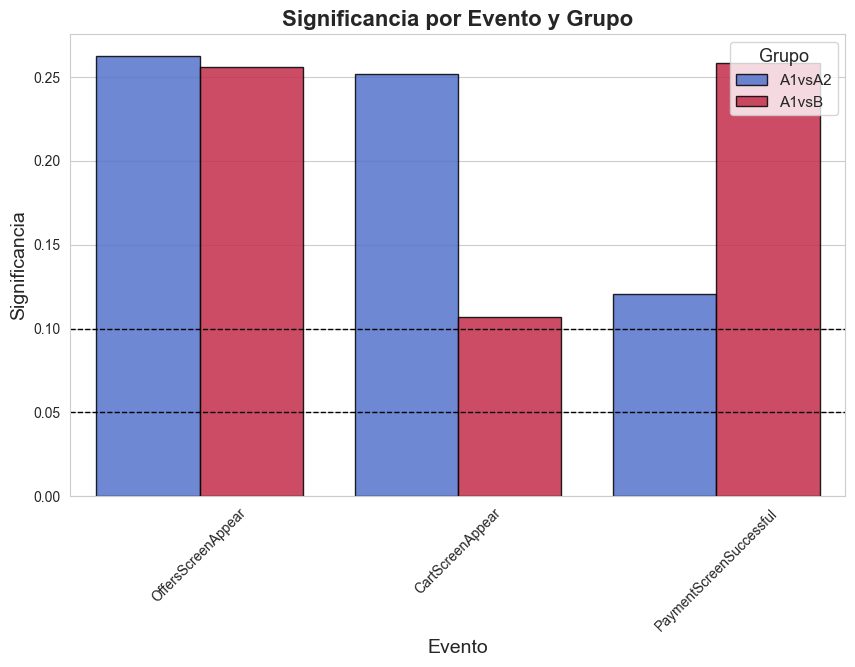

In [46]:
# Configurar estilo y paleta de colores
sns.set_style('whitegrid')
sns.set_palette(['royalblue', 'crimson']) 

# Ajustar tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar barras con bordes y transparencia
sns.barplot(
    data=signif,
    x='event',
    y='signif',
    hue='group',
    edgecolor='black',
    alpha=0.85
)

# Agregar líneas de referencia con etiquetas
plt.axhline(y=0.05, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.1, color='black', linestyle='--', linewidth=1)


# Títulos y etiquetas mejoradas
plt.title('Significancia por Evento y Grupo', fontsize=16, fontweight='bold')
plt.xlabel('Evento', fontsize=14)
plt.ylabel('Significancia', fontsize=14)
plt.xticks(rotation=45)

# Mejorar la leyenda
plt.legend(title="Grupo", title_fontsize='13', fontsize='11')

# Mostrar gráfico
plt.show()

El nivel de significancia lo establecimos con el 95% de confianza, pero si lo bajamos a 90% existen algunos grupos que estarian apenas pasando la confianza, lo que ocasionaria que tal vez con mas tiempo en el experimento se rechace la hipotesis dado que ya existiria la desigualdad, por lo que tendriamos que estar analizando el comportamiento de dichos grupos aun con el 95% de confianza 